In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../../data/processed/cleaned_music_population.csv')
df.head()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [3]:
df_onehot = pd.get_dummies(df, drop_first=True)
df_onehot.shape, df.shape

((45020, 31), (45020, 13))

In [4]:
#Eliminating outliers
df_onehot = df_onehot[df_onehot['popularity'] > 0]

In [5]:
X = df_onehot.drop(columns=['popularity'])
y = df_onehot['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [6]:
df_results = X_test.copy()
df_results['popularity_real'] = y_test
df_results['popularity_pred'] = y_pred.round(2)

df_results.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,...,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,popularity_real,popularity_pred
33271,0.218000,0.552,0.742,0.000000,0.3390,-7.963,0.0454,138.591,0.751,False,...,False,False,False,False,False,False,False,True,65.0,58.96
29914,0.002960,0.637,0.923,0.004120,0.4830,-7.509,0.1880,124.691,0.317,False,...,True,False,False,False,False,False,False,False,30.0,34.29
17309,0.482000,0.754,0.367,0.000067,0.1530,-12.631,0.0952,86.989,0.826,False,...,False,False,False,False,False,False,False,False,53.0,50.45
29456,0.000107,0.591,0.746,0.527000,0.1950,-7.066,0.0265,131.377,0.857,False,...,True,False,False,False,False,False,False,False,41.0,34.47
41579,0.315000,0.351,0.699,0.000002,0.1100,-7.021,0.2430,80.807,0.350,True,...,False,False,False,False,True,False,False,False,54.0,58.01
12582,0.921000,0.657,0.212,0.755000,0.1130,-13.372,0.1630,81.005,0.710,False,...,False,False,False,False,False,True,False,False,49.0,39.53
34419,0.021100,0.529,0.830,0.000000,0.0983,-5.428,0.0397,93.933,0.318,False,...,False,False,False,False,False,False,False,True,58.0,60.48
31461,0.017300,0.575,0.591,0.000000,0.1730,-5.916,0.0280,107.967,0.332,False,...,False,False,False,False,False,False,False,True,54.0,60.52
34760,0.029700,0.535,0.975,0.126000,0.0482,-2.959,0.0647,96.004,0.689,False,...,False,False,False,False,False,False,False,True,70.0,59.91
15449,0.575000,0.669,0.917,0.801000,0.0968,-8.060,0.0471,123.179,0.923,True,...,False,False,False,False,False,False,False,False,46.0,48.68


In [7]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

for idx, col_name in enumerate(X.columns):
    print(f'Coefficient for {col_name}: {model.coef_[idx]}')

Intercept: 44.809967619315785
Coefficients: [-4.81722946e-02  2.94488872e-01  1.52545763e-02 -8.46411303e-01
 -4.92421805e-01  4.72154060e-01 -5.77952190e-01 -5.17174883e-02
 -7.64445498e-02  4.66119131e-02  1.15977196e-01 -4.06710893e-04
  1.11193041e-01  1.02557146e-01  4.24264087e-02  6.44769624e-02
  2.68088661e-02  8.29841417e-02 -1.06585782e-02  1.75256539e-01
  1.04190268e-01 -7.62717198e+00 -4.48644533e+00 -4.25280305e+00
 -1.26055608e+00 -3.36034879e+00  2.50940084e+00 -2.51720645e+00
  3.14645944e+00  2.80533690e+00]
Coefficient for acousticness: -0.048172294576474796
Coefficient for danceability: 0.2944888718668137
Coefficient for energy: 0.015254576252138774
Coefficient for instrumentalness: -0.8464113033161003
Coefficient for liveness: -0.4924218050197468
Coefficient for loudness: 0.47215406037732044
Coefficient for speechiness: -0.577952190024045
Coefficient for tempo: -0.05171748829324402
Coefficient for valence: -0.07644454984861093
Coefficient for key_A#: 0.04661191306

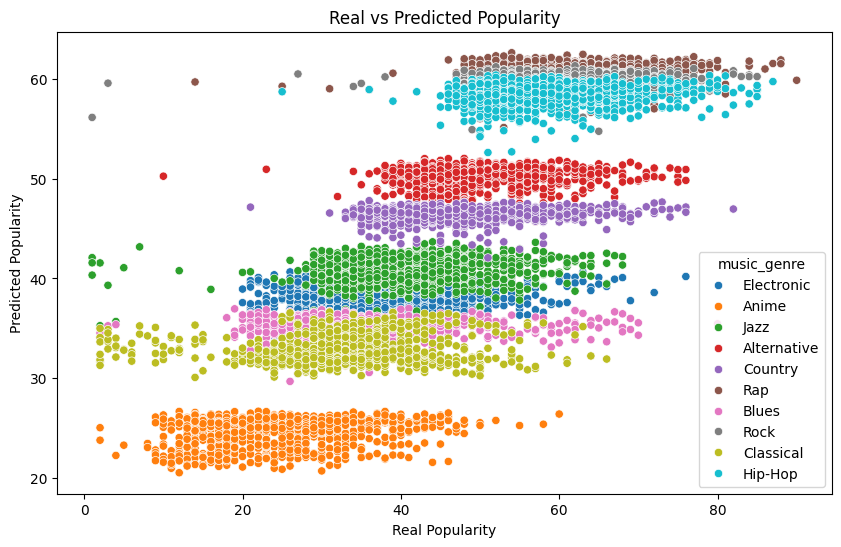

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity_real', y='popularity_pred', data=df_results, hue=df['music_genre'])
plt.title('Real vs Predicted Popularity')
plt.xlabel('Real Popularity')
plt.ylabel('Predicted Popularity')
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rsme = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rsme}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 77.25264362365509
Root Mean Squared Error: 8.78934830483211
R-squared: 0.6390157435027207
Mean Absolute Error: 6.768156814591421


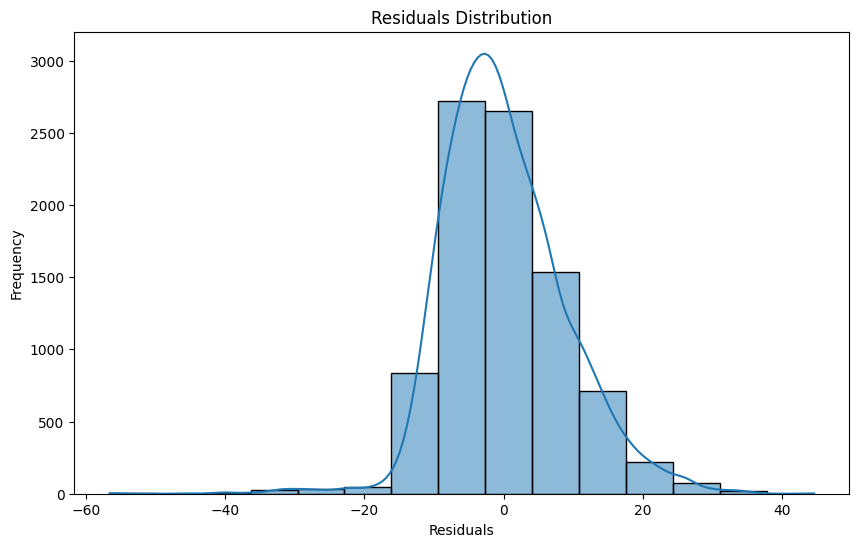

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [11]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

In [12]:
df_results_tree = X_test.copy()
df_results_tree['popularity_real'] = y_test
df_results_tree['popularity_pred'] = y_pred_dt.round(2)

df_results_tree.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,...,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,popularity_real,popularity_pred
33271,0.218000,0.552,0.742,0.000000,0.3390,-7.963,0.0454,138.591,0.751,False,...,False,False,False,False,False,False,False,True,65.0,53.0
29914,0.002960,0.637,0.923,0.004120,0.4830,-7.509,0.1880,124.691,0.317,False,...,True,False,False,False,False,False,False,False,30.0,51.0
17309,0.482000,0.754,0.367,0.000067,0.1530,-12.631,0.0952,86.989,0.826,False,...,False,False,False,False,False,False,False,False,53.0,64.0
29456,0.000107,0.591,0.746,0.527000,0.1950,-7.066,0.0265,131.377,0.857,False,...,True,False,False,False,False,False,False,False,41.0,56.0
41579,0.315000,0.351,0.699,0.000002,0.1100,-7.021,0.2430,80.807,0.350,True,...,False,False,False,False,True,False,False,False,54.0,67.0
12582,0.921000,0.657,0.212,0.755000,0.1130,-13.372,0.1630,81.005,0.710,False,...,False,False,False,False,False,True,False,False,49.0,55.0
34419,0.021100,0.529,0.830,0.000000,0.0983,-5.428,0.0397,93.933,0.318,False,...,False,False,False,False,False,False,False,True,58.0,63.0
31461,0.017300,0.575,0.591,0.000000,0.1730,-5.916,0.0280,107.967,0.332,False,...,False,False,False,False,False,False,False,True,54.0,73.0
34760,0.029700,0.535,0.975,0.126000,0.0482,-2.959,0.0647,96.004,0.689,False,...,False,False,False,False,False,False,False,True,70.0,59.0
15449,0.575000,0.669,0.917,0.801000,0.0968,-8.060,0.0471,123.179,0.923,True,...,False,False,False,False,False,False,False,False,46.0,41.0


En este caso tenemos un peor desempeño para los arboles de decision, deberiamos cambiar parametros para ver si mejora

In [13]:
mse_tree = mean_squared_error(y_test, y_pred_dt)
rsme_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_dt)
mae_tree = mean_absolute_error(y_test, y_pred_dt)

print(f'Mean Squared Error: {mse_tree}')
print(f'Root Mean Squared Error: {rsme_tree}')
print(f'R-squared: {r2_tree}')
print(f'Mean Absolute Error: {mae_tree}')

Mean Squared Error: 157.12642189435746
Root Mean Squared Error: 12.535007853781243
R-squared: 0.2657835133781169
Mean Absolute Error: 9.65671809888501


Obtuvimos un mejor resultado con el RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=30, random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

In [15]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Mean Squared Error (RF): {mse_rf}')
print(f'Root Mean Squared Error (RF): {rmse_rf}')
print(f'R-squared (RF): {r2_rf}')
print(f'Mean Absolute Error (RF): {mae_rf}')

Mean Squared Error (RF): 77.69090643833951
Root Mean Squared Error (RF): 8.814244518864877
R-squared (RF): 0.6369678397820405
Mean Absolute Error (RF): 6.803994489405178


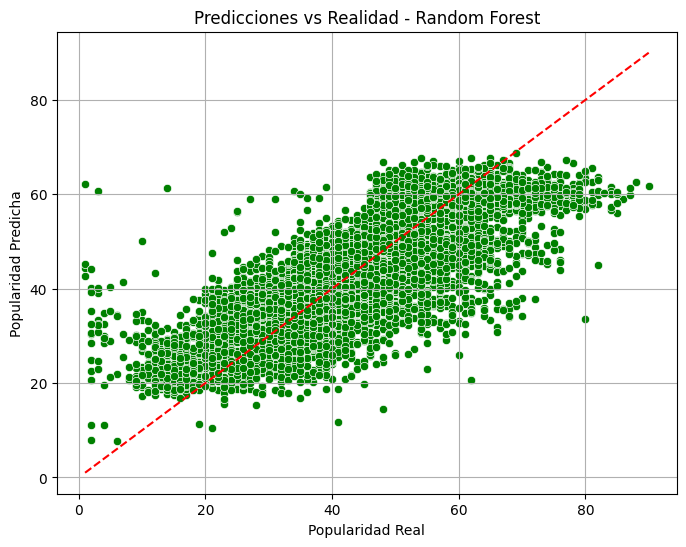

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Popularidad Real")
plt.ylabel("Popularidad Predicha")
plt.title("Predicciones vs Realidad - Random Forest")
plt.grid(True)
plt.show()

In [17]:
from sklearn.svm import SVR

model_svr = SVR(kernel='linear')
model_svr.fit(X_train_scaled, y_train)

y_pred_svr = model_svr.predict(X_test_scaled)

In [18]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'Root Mean Squared Error (SVR): {rmse_svr}')
print(f'R-squared (SVR): {r2_svr}')
print(f'Mean Absolute Error (SVR): {mae_svr}')

Mean Squared Error (SVR): 78.69700809327477
Root Mean Squared Error (SVR): 8.871133416496157
R-squared (SVR): 0.6322665526696306
Mean Absolute Error (SVR): 6.712431056569566


In [19]:
model_svr_rbf = SVR(kernel='rbf')
model_svr_rbf.fit(X_train_scaled, y_train)

y_pred_svr_rbf = model_svr_rbf.predict(X_test_scaled)

In [20]:
mse_svr_rbf = mean_squared_error(y_test, y_pred_svr_rbf)
rmse_svr_rbf = mse_svr_rbf ** 0.5
r2_svr_rbf = r2_score(y_test, y_pred_svr_rbf)
mae_svr_rbf = mean_absolute_error(y_test, y_pred_svr_rbf)

print(f'Mean Squared Error (SVR RBF): {mse_svr_rbf}')
print(f'Root Mean Squared Error (SVR RBF): {rmse_svr_rbf}')
print(f'R-squared (SVR RBF): {r2_svr_rbf}')
print(f'Mean Absolute Error (SVR RBF): {mae_svr_rbf}')

Mean Squared Error (SVR RBF): 79.42130512799086
Root Mean Squared Error (SVR RBF): 8.911863168159107
R-squared (SVR RBF): 0.628882075268004
Mean Absolute Error (SVR RBF): 6.76545576941465


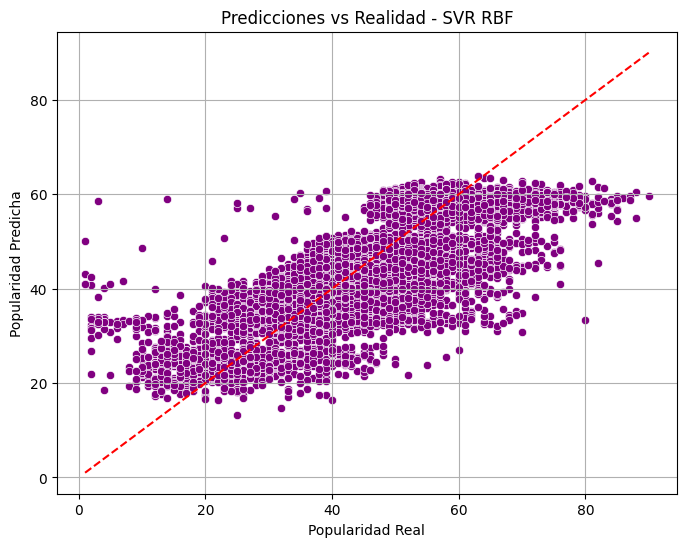

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_svr_rbf, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Popularidad Real")
plt.ylabel("Popularidad Predicha")
plt.title("Predicciones vs Realidad - SVR RBF")
plt.grid(True)
plt.show()